# Tarefas Módulo 8
- Nome: Cícero Henrique dos Santos
- Data: 02/10/2022


### Considere o dataset abaixo:

In [1524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [1525]:
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

- ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidade;

- perc_pol = percentual de policiais ativos na cidade;

- taxa_crim = taxa de criminalidade histórica da cidade;

- nivel_ed = nível educacional médio da cidade;

- crimes = quantidade de crimes registrados no mês vigente;


# Exercícios

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 


#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)

In [1526]:
def divide_treino_e_teste(dataframe, percentual_teste: int):
    
    # Copia o dataframe base
    df = dataframe.copy()
    
    # Com base na porcentagem, identifica a linha de corte de acordo com o total de quantidade de linhas do dataframe
    qtd_dados_treino = len(df)*(percentual_teste/100)
    qtd_dados_treino = int(qtd_dados_treino) # Transforma em numero inteiro
    
    # Criar os dataframes de teste e treino com base na porcentagem passada 
    df_treino = pd.DataFrame(df.iloc[:qtd_dados_treino])
    df_teste = pd.DataFrame(df.iloc[qtd_dados_treino:])
    
    # Returna os dataframes de treino e teste
    return df_treino, df_teste

In [1527]:
# Usa a função para dividir a porcentagem de linhas de treino e teste de um dataframe
divide_treino_e_teste(df, 25)

(     ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
 0            1.0   7.185471  62.082693      10.0      77
 1            1.0  24.456750  88.244380       6.0     202
 2            1.0  19.791772  94.930257       1.0     348
 3            4.0  10.089496  41.791507       6.0     114
 4            3.0  34.697495  67.615795       1.0      47
 ..           ...        ...        ...       ...     ...
 610          3.0   6.987886  64.352064       3.0     344
 611          4.0   4.091551  52.447571       4.0     253
 612          2.0   1.484661  36.890828       3.0     139
 613          4.0  17.015379  61.276596       9.0     148
 614          2.0  42.683878  93.438586       3.0      12
 
 [615 rows x 5 columns],
       ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
 615           4.0  28.105493  78.875703       7.0     127
 616           4.0  21.987137  92.904009       8.0     276
 617           4.0  16.073622  23.303663       1.0      29
 618           4.0  12.529803  35.832769 

In [1528]:
# Cria 2 dataframes com base no retorno da função 
dataframe_treino, dataframe_teste = divide_teste_e_treino(df, 25.0)

In [1529]:
dataframe_treino

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47
...,...,...,...,...,...
610,3.0,6.987886,64.352064,3.0,344
611,4.0,4.091551,52.447571,4.0,253
612,2.0,1.484661,36.890828,3.0,139
613,4.0,17.015379,61.276596,9.0,148


In [1530]:
dataframe_teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
615,4.0,28.105493,78.875703,7.0,127
616,4.0,21.987137,92.904009,8.0,276
617,4.0,16.073622,23.303663,1.0,29
618,4.0,12.529803,35.832769,4.0,84
619,4.0,11.856335,35.529906,7.0,53
...,...,...,...,...,...
2455,1.0,3.507206,56.070224,1.0,231
2456,4.0,28.222931,46.858543,3.0,18
2457,1.0,13.055995,87.372664,9.0,217
2458,2.0,22.632517,46.170517,6.0,42


---

## Parte 2:

### 1 - Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

#### Avaiação das variáveis individualmente com a variável crimes

Relação Tamanho da População X Qtd_Crime:



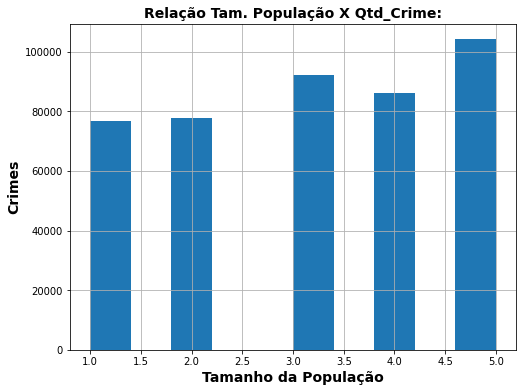

In [1531]:
print("Relação Tamanho da População X Qtd_Crime:\n")
plt.figure(figsize=[8,6])
plt.hist(df['ind_pop_cid'],weights=df['crimes'])
plt.xlabel('Tamanho da População', fontweight ='bold', fontsize = 14)
plt.ylabel('Crimes', fontweight ='bold', fontsize = 14)
plt.title("Relação Tam. População X Qtd_Crime:", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

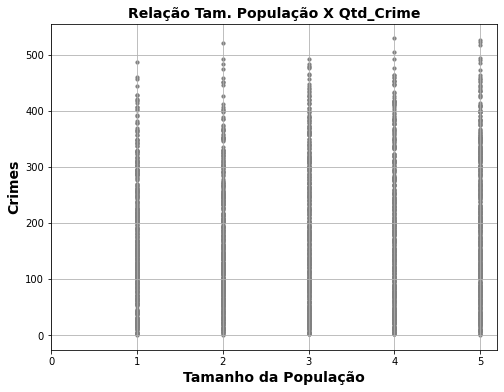

In [1532]:
#plot da dispersão entre as variáveis

plt.figure(figsize=[8,6])
plt.scatter(df['ind_pop_cid'], df['crimes'], s = 10, c = 'gray')
plt.xlabel("Tamanho da População", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.title("Relação Tam. População X Qtd_Crime", fontsize = 14, fontweight = 'bold')
plt.xticks(range(0,6))
plt.grid()
plt.show()

Relação Percentual de Policiais X Qtd_Crime:



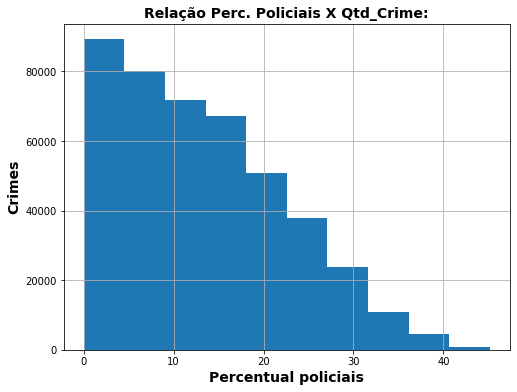

In [1533]:
print("Relação Percentual de Policiais X Qtd_Crime:\n")
plt.figure(figsize=[8,6])
plt.hist(df['perc_pol'],weights=df['crimes'])
plt.xlabel('Percentual policiais', fontweight ='bold', fontsize = 14)
plt.ylabel('Crimes', fontweight ='bold', fontsize = 14)
plt.title("Relação Perc. Policiais X Qtd_Crime:", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

#### Fazer o gráfico dos pontos para analisar viualmente melhor

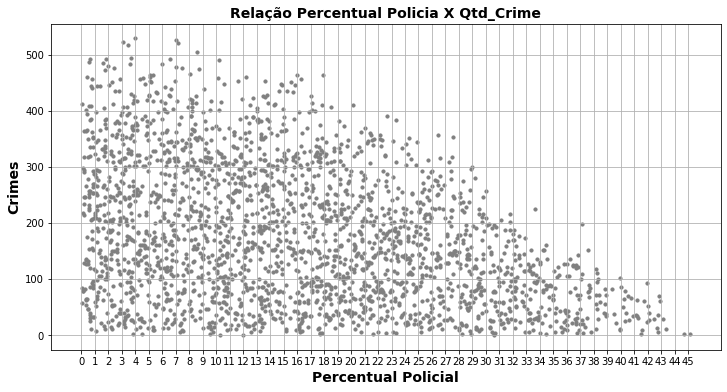

In [1534]:
#plot da dispersão entre as variáveis

plt.figure(figsize=[12,6])
plt.scatter(df['perc_pol'], df['crimes'], s = 10, c = 'gray')
plt.xlabel("Percentual Policial", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.title("Relação Percentual Policia X Qtd_Crime", fontsize = 14, fontweight = 'bold')
plt.xticks(range(0,46))
plt.grid()
plt.show()

Relação Taxa de Criminalidade X Qtd_Crime:



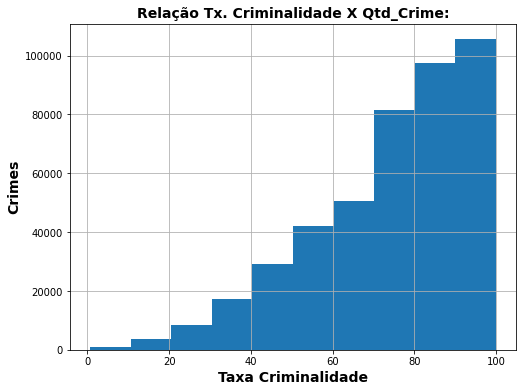

In [1535]:
print("Relação Taxa de Criminalidade X Qtd_Crime:\n")
plt.figure(figsize=[8,6])
plt.hist(df['taxa_crim'],weights=df['crimes'])
plt.xlabel('Taxa Criminalidade', fontweight ='bold', fontsize = 14)
plt.ylabel('Crimes', fontweight ='bold', fontsize = 14)
plt.title("Relação Tx. Criminalidade X Qtd_Crime:", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

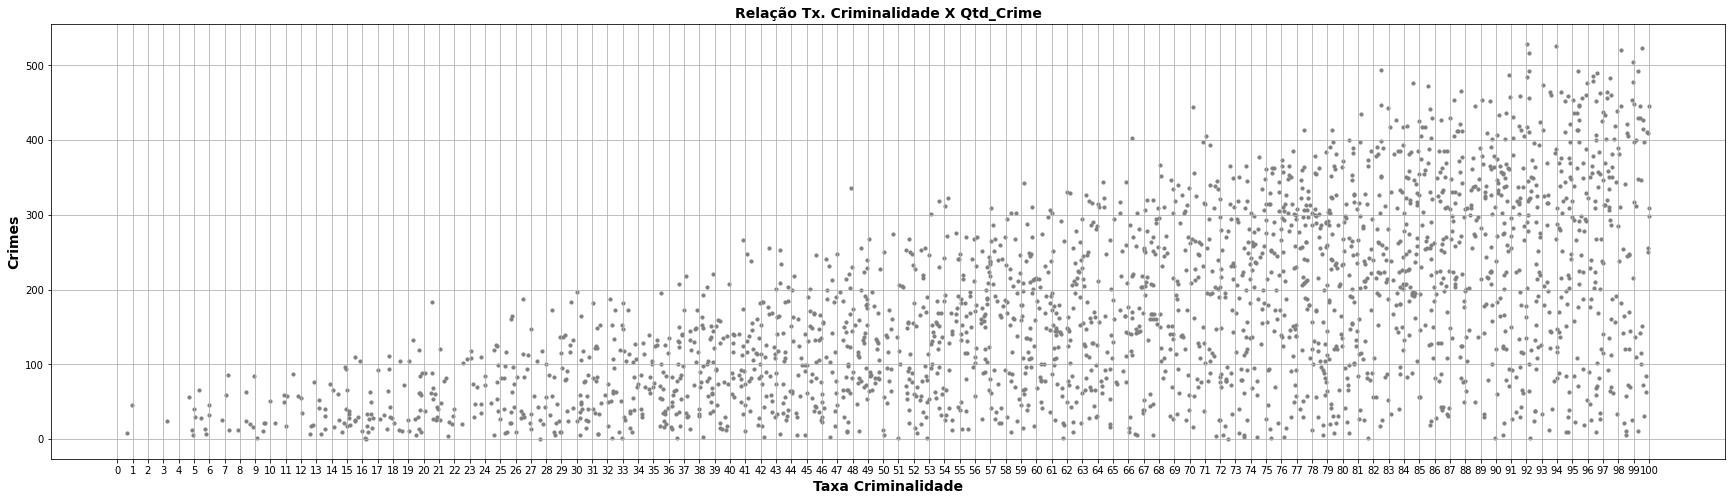

In [1536]:
#plot da dispersão entre as variáveis

plt.figure(figsize=[30,8])
plt.scatter(df['taxa_crim'], df['crimes'], s = 10, c = 'gray')
plt.xlabel("Taxa Criminalidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.title("Relação Tx. Criminalidade X Qtd_Crime", fontsize = 14, fontweight = 'bold')
plt.xticks(range(0,101))
plt.grid()
plt.show()

Relação Nível Educacional X Qtd_Crime:



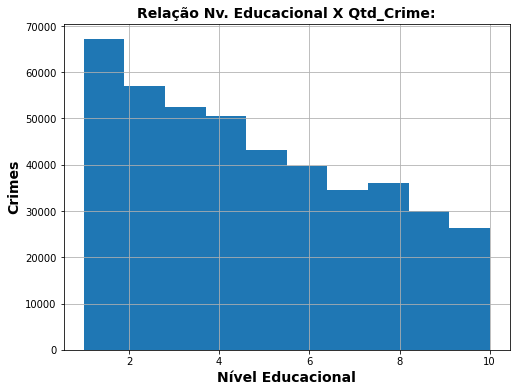

In [1537]:
print("Relação Nível Educacional X Qtd_Crime:\n")
plt.figure(figsize=[8,6])
plt.hist(df['nivel_ed'],weights=df['crimes'])
plt.xlabel('Nível Educacional', fontweight ='bold', fontsize = 14)
plt.ylabel('Crimes', fontweight ='bold', fontsize = 14)
plt.title("Relação Nv. Educacional X Qtd_Crime:", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

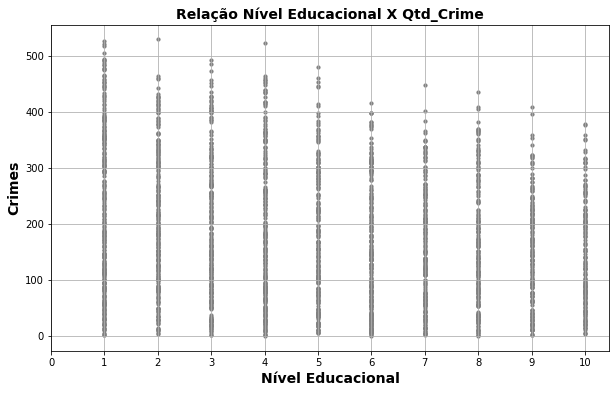

In [1538]:
#plot da dispersão entre as variáveis

plt.figure(figsize=[10,6])
plt.scatter(df['nivel_ed'], df['crimes'], s = 10, c = 'gray')
plt.xlabel("Nível Educacional", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.title("Relação Nível Educacional X Qtd_Crime", fontsize = 14, fontweight = 'bold')
plt.xticks(range(0,11))
plt.grid()
plt.show()

#### **Justificativa de escolha da variável:** Para prever a quantidade de crimes, foi escolhido como variável única, a variável perc_pol. Entre a variável de nivel_ed, está para mim se destacou como mais relevante, pois pelo dataset, foi a variável que demonstrou ter uma queda muito considerável. Por mais que aumentando a educação também abaixe, o nível de 10, comparado aos 40% de policiais na cidade, ainda é é muito maior a quantidade de crimes, ou seja, o crime diminui bem mais com policiais do que só no investimento em educação.

---

### 1.1 Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

##### Limpar os datasets de treino e teste. Deixando apenas as colunas a serem analisadas

In [1539]:
df_arredondado = df
df_arredondado['perc_pol'] = df_arredondado['perc_pol'].apply(np.ceil) #Arredonda os valores para o maior valor inteiro
df_arredondado

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,8.0,62.082693,10.0,77
1,1.0,25.0,88.244380,6.0,202
2,1.0,20.0,94.930257,1.0,348
3,4.0,11.0,41.791507,6.0,114
4,3.0,35.0,67.615795,1.0,47
...,...,...,...,...,...
2455,1.0,4.0,56.070224,1.0,231
2456,4.0,29.0,46.858543,3.0,18
2457,1.0,14.0,87.372664,9.0,217
2458,2.0,23.0,46.170517,6.0,42


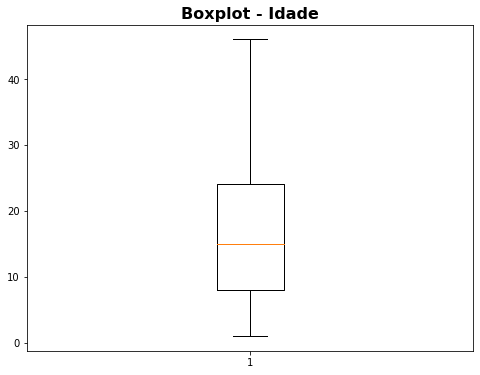

In [1540]:
plt.figure(figsize=[8,6])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(df_arredondado.perc_pol)
plt.show()

##### Obs.: Não foi identificado valores discrepantes

In [1541]:
df_treino, df_teste = divide_teste_e_treino(df_arredondado, 25.0)

In [1542]:
df_treino

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,8.0,62.082693,10.0,77
1,1.0,25.0,88.244380,6.0,202
2,1.0,20.0,94.930257,1.0,348
3,4.0,11.0,41.791507,6.0,114
4,3.0,35.0,67.615795,1.0,47
...,...,...,...,...,...
610,3.0,7.0,64.352064,3.0,344
611,4.0,5.0,52.447571,4.0,253
612,2.0,2.0,36.890828,3.0,139
613,4.0,18.0,61.276596,9.0,148


In [1543]:
df_teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
615,4.0,29.0,78.875703,7.0,127
616,4.0,22.0,92.904009,8.0,276
617,4.0,17.0,23.303663,1.0,29
618,4.0,13.0,35.832769,4.0,84
619,4.0,12.0,35.529906,7.0,53
...,...,...,...,...,...
2455,1.0,4.0,56.070224,1.0,231
2456,4.0,29.0,46.858543,3.0,18
2457,1.0,14.0,87.372664,9.0,217
2458,2.0,23.0,46.170517,6.0,42


In [1544]:
df_treino.drop(columns=['ind_pop_cid', 'taxa_crim', 'nivel_ed'], inplace = True)
# df_treino = df_treino.groupby('perc_pol')['crimes'].sum().reset_index()
df_treino

,perc_pol,crimes
0,8.0,77
1,25.0,202
2,20.0,348
3,11.0,114
4,35.0,47
...,...,...
610,7.0,344
611,5.0,253
612,2.0,139
613,18.0,148


In [1545]:
df_teste.drop(columns=['ind_pop_cid', 'taxa_crim', 'nivel_ed'], inplace = True)
# df_teste = df_teste.groupby('perc_pol')['crimes'].sum().reset_index()
df_teste

,perc_pol,crimes
615,29.0,127
616,22.0,276
617,17.0,29
618,13.0,84
619,12.0,53
...,...,...
2455,4.0,231
2456,29.0,18
2457,14.0,217
2458,23.0,42


##### Agrupar e ordenar pela coluna de perc_pol

In [1546]:
df_treino.sort_values(by=['perc_pol'], ascending=True, inplace=True)
# df_treino = df_treino.reset_index(drop=True) # Reseta o index no dataframe de teste
df_treino

,perc_pol,crimes
567,1.0,31
34,1.0,441
163,1.0,234
43,1.0,156
376,1.0,89
...,...,...
568,42.0,31
387,43.0,29
614,43.0,12
64,45.0,2


In [1547]:
df_teste.sort_values(by=['perc_pol'], ascending=True, inplace=True)
# df_teste = df_teste.reset_index(drop=True) # Reseta o index no dataframe de treino
df_teste

,perc_pol,crimes
1697,1.0,383
720,1.0,223
1714,1.0,153
1914,1.0,319
671,1.0,247
...,...,...
812,43.0,52
1364,43.0,40
674,43.0,70
1621,44.0,28


##### Salvar a coluna perc_policial na variável x e crimes na variável y

In [1548]:
X = df_treino['perc_pol'].values.reshape(-1,1)
Y = df_treino['crimes'].values

##### Definir função RMSE

In [1549]:
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

#### Aplicar modelo LinearRegression

In [1550]:
# Instanciando o Algoritmo

lm = LinearRegression()
lm

LinearRegression()

In [1551]:
# Ajustando os dados para o formato correto  
X = X
Y = Y

In [1552]:
# Fitando - treinando - o modelo aos dados

lm.fit(X, Y)

LinearRegression()

In [1553]:
# Fazendo as Predições

Ypred = lm.predict(X)
Ypred

array([249.20022846, 249.20022846, 249.20022846, 249.20022846,
       249.20022846, 249.20022846, 249.20022846, 249.20022846,
       249.20022846, 249.20022846, 249.20022846, 249.20022846,
       249.20022846, 249.20022846, 249.20022846, 249.20022846,
       249.20022846, 249.20022846, 249.20022846, 249.20022846,
       249.20022846, 249.20022846, 249.20022846, 249.20022846,
       249.20022846, 249.20022846, 244.83142514, 244.83142514,
       244.83142514, 244.83142514, 244.83142514, 244.83142514,
       244.83142514, 244.83142514, 244.83142514, 244.83142514,
       244.83142514, 244.83142514, 244.83142514, 244.83142514,
       244.83142514, 244.83142514, 244.83142514, 244.83142514,
       244.83142514, 244.83142514, 244.83142514, 244.83142514,
       244.83142514, 244.83142514, 244.83142514, 244.83142514,
       244.83142514, 244.83142514, 240.46262183, 240.46262183,
       240.46262183, 240.46262183, 240.46262183, 240.46262183,
       240.46262183, 240.46262183, 240.46262183, 240.46

In [1554]:
RMSE(y = Y, y_pred = Ypred)

113.82673443873281

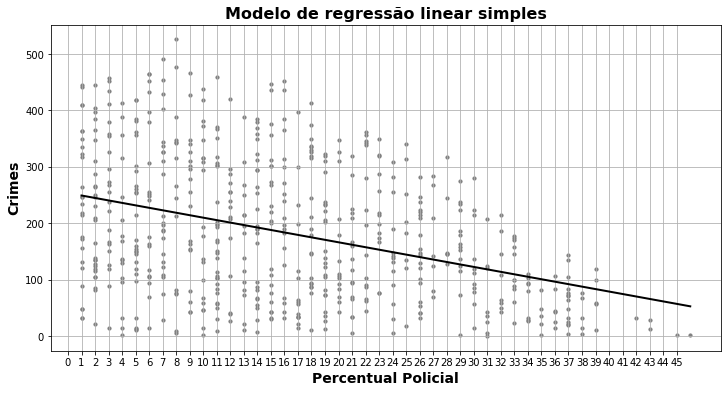

In [1555]:
#plot da dispersão entre as variáveis

plt.figure(figsize=[12,6])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 10, c = 'gray')
plt.xlabel("Percentual Policial", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,46))

plt.plot(X, Ypred, c = 'black', lw = 2)
plt.grid()
plt.show()

##### Aplicar modelo KNN

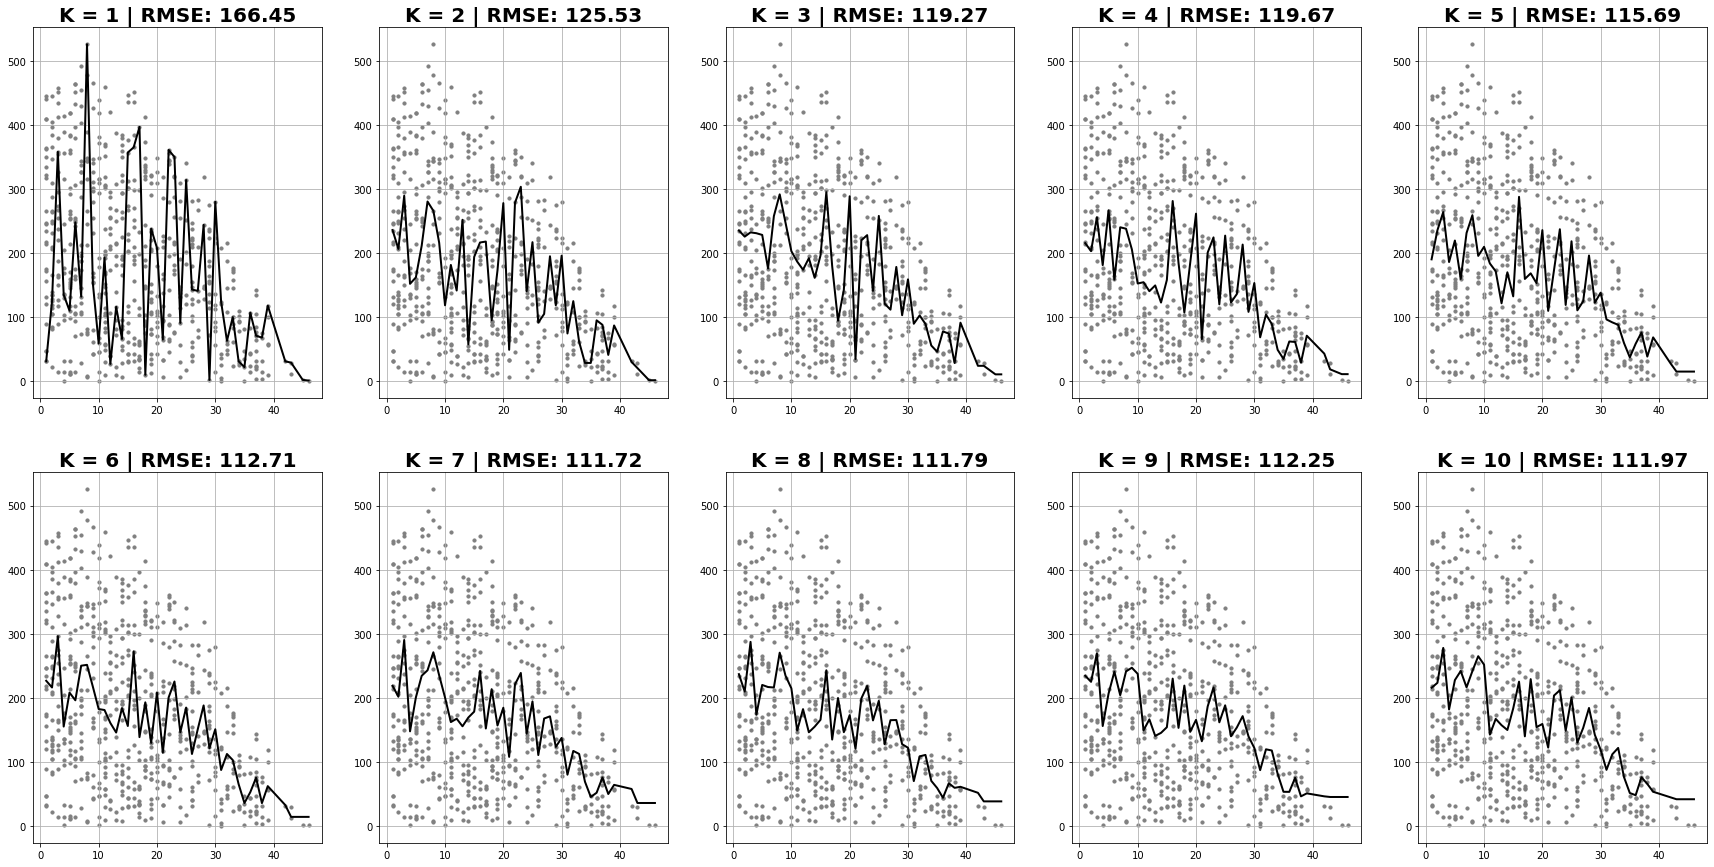

In [1556]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, Y)
    rmse_knn = np.round(RMSE(y = Y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 10, c = 'gray')
    plt.grid()

plt.show()

In [1557]:
def plota_curva_regressao(X, Y, Xnovo, Ynovo, modelo, nome_modelo):
    
    modelo.fit(X, Y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = Y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = Ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, Y, c = 'gray', s = 10)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TESTE: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, Ynovo, c = 'gray', s = 10)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [1558]:
X = df_treino['perc_pol'].values.reshape(-1,1)
Y = df_treino['crimes'].values
Xnovo = df_teste['perc_pol'].values.reshape(-1,1)
Ynovo = df_teste['crimes'].values

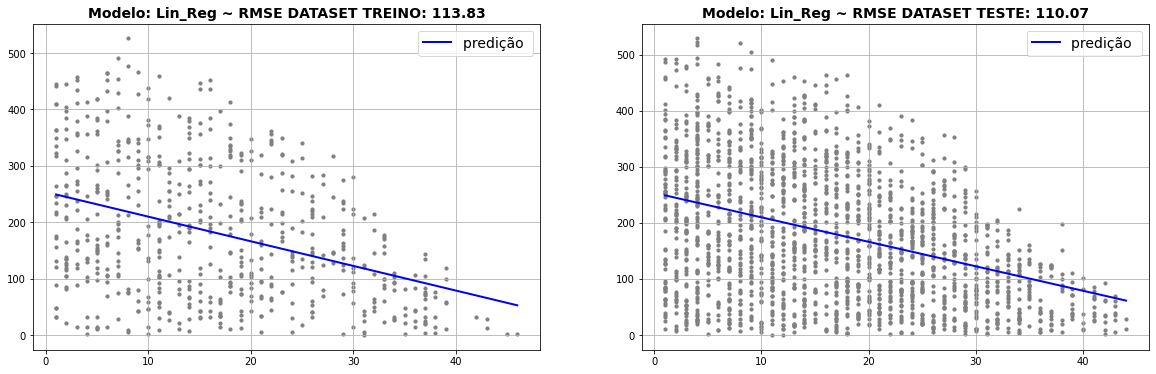

In [1559]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, Y, Xnovo, Ynovo, modelo, nome_modelo)

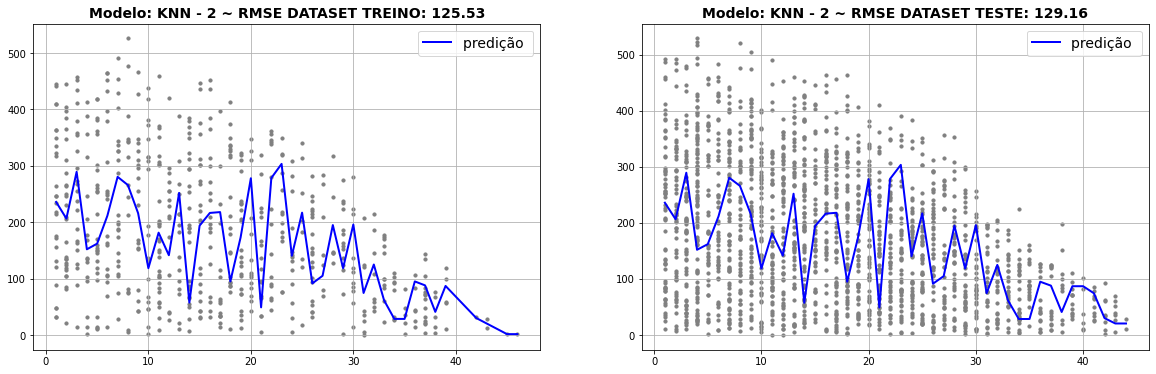

In [1560]:
modelo = KNeighborsRegressor(n_neighbors = 2)
nome_modelo = 'KNN - 2'
plota_curva_regressao(X, Y, Xnovo, Ynovo, modelo, nome_modelo)

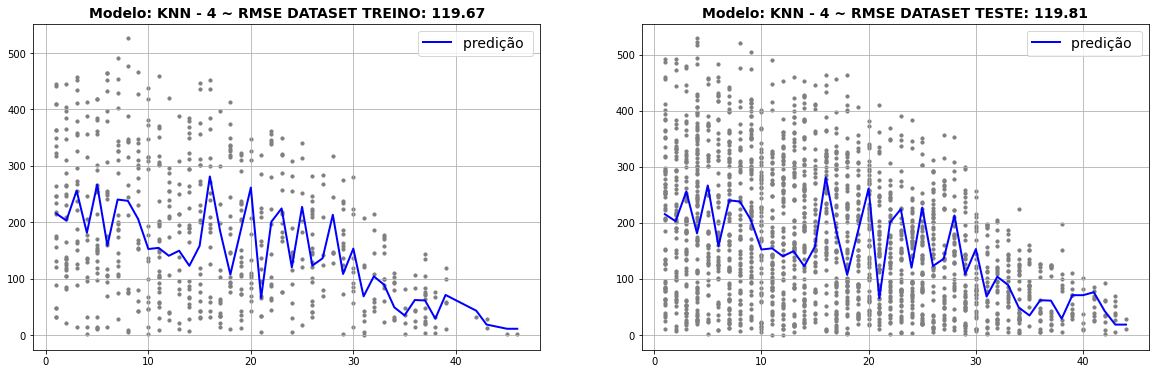

In [1561]:
modelo = KNeighborsRegressor(n_neighbors = 4)
nome_modelo = 'KNN - 4'
plota_curva_regressao(X, Y, Xnovo, Ynovo, modelo, nome_modelo)

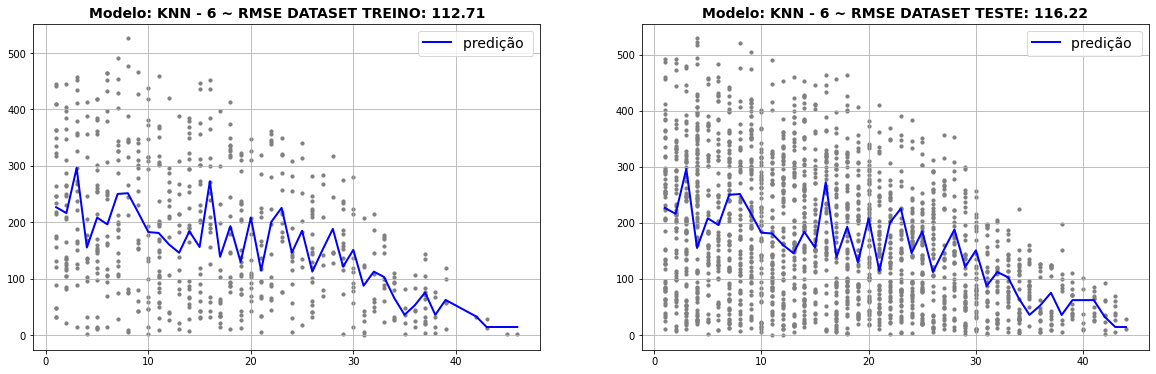

In [1562]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 6'
plota_curva_regressao(X, Y, Xnovo, Ynovo, modelo, nome_modelo)

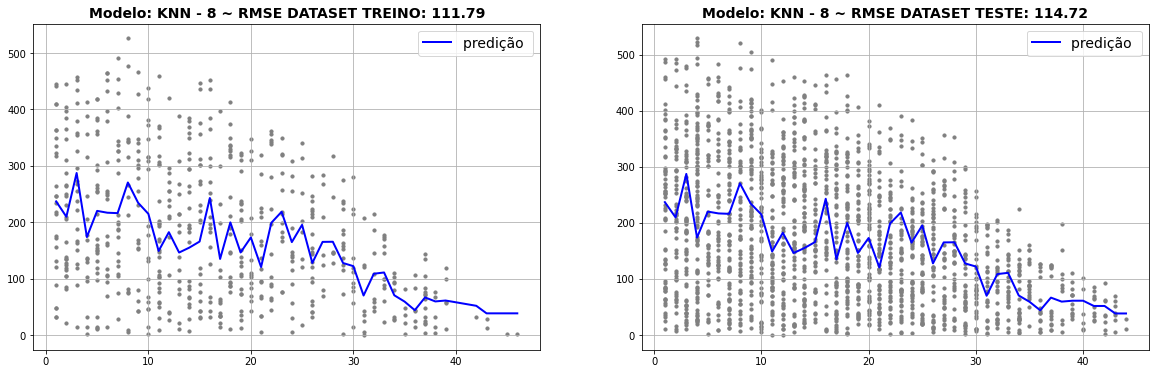

In [1563]:
modelo = KNeighborsRegressor(n_neighbors = 8)
nome_modelo = 'KNN - 8'
plota_curva_regressao(X, Y, Xnovo, Ynovo, modelo, nome_modelo)

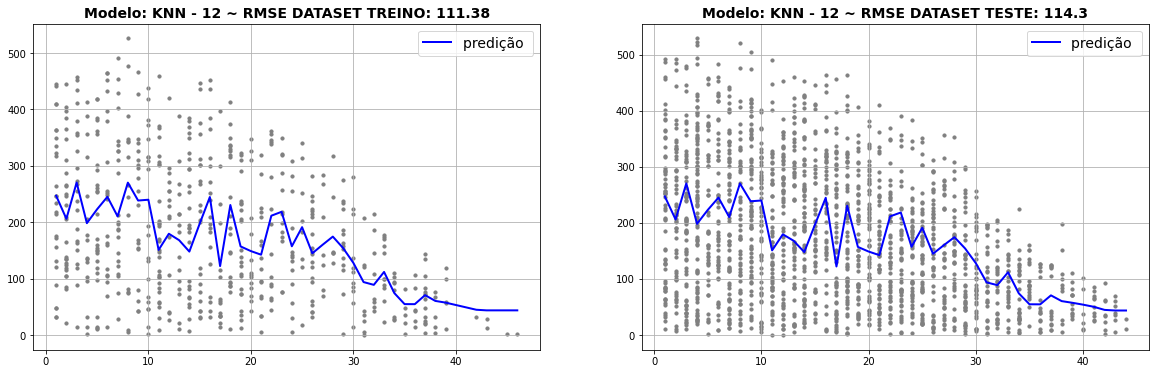

In [1564]:
modelo = KNeighborsRegressor(n_neighbors = 12)
nome_modelo = 'KNN - 12'
plota_curva_regressao(X, Y, Xnovo, Ynovo, modelo, nome_modelo)

##### Obs: A princípio ao comparar as métricas entre os datasets de treino e teste, os modelos demonstrar estar performando bem, não apresentando overfiting. Isso se fez devido o processo de arredondamento dos valores percentuais para inteiro e não deixar os datasets de forma ordenada.

### 2 - Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.


##### Comaparar os modelos com os datasets de teste e treino

In [1593]:
df_completo = df
df_completo['taxa_crim'] = df_completo['taxa_crim'].apply(np.ceil) #Arredonda os valores para o maior valor inteiro
df_completo_treino, df_completo_teste = divide_teste_e_treino(df_completo, 25.0)

In [1594]:
df_completo_treino

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,8.0,63.0,10.0,77
1,1.0,25.0,89.0,6.0,202
2,1.0,20.0,95.0,1.0,348
3,4.0,11.0,42.0,6.0,114
4,3.0,35.0,68.0,1.0,47
...,...,...,...,...,...
610,3.0,7.0,65.0,3.0,344
611,4.0,5.0,53.0,4.0,253
612,2.0,2.0,37.0,3.0,139
613,4.0,18.0,62.0,9.0,148


In [1595]:
df_completo_teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
615,4.0,29.0,79.0,7.0,127
616,4.0,22.0,93.0,8.0,276
617,4.0,17.0,24.0,1.0,29
618,4.0,13.0,36.0,4.0,84
619,4.0,12.0,36.0,7.0,53
...,...,...,...,...,...
2455,1.0,4.0,57.0,1.0,231
2456,4.0,29.0,47.0,3.0,18
2457,1.0,14.0,88.0,9.0,217
2458,2.0,23.0,47.0,6.0,42


In [1596]:
X_completo = df_completo_treino[['ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed']].values
Y_completo = df_completo_treino['crimes'].values

In [1597]:
lm.fit(X_completo, Y_completo)

LinearRegression()

In [1598]:
Ypred_completo = lm.predict(X_completo)
Ypred_completo

array([ 1.45902324e+02,  1.75596345e+02,  3.17720893e+02,  1.15386796e+02,
        8.46858224e+01,  5.88568552e+01,  1.76914219e+02,  9.03491991e+00,
        2.69668643e+02,  3.16795464e+02,  5.14131735e+01,  2.31451302e+02,
        1.39148563e+02,  3.92770520e+02,  1.32105813e+02,  2.28163028e+02,
        1.57533849e+02,  9.70420530e+01,  2.81655052e+02,  8.85694870e+01,
        1.46470091e+02,  9.81357404e+00,  1.93859225e+02,  1.03217503e+02,
        2.83328064e+02,  3.51303957e+02,  2.45598770e+02,  2.57068837e+02,
        1.62593046e+02,  2.47156207e+01,  3.21134009e+02,  1.70765661e+02,
        2.36143240e+02,  1.89669978e+02,  4.67822837e+02, -1.13447542e+01,
        7.50109593e+01,  3.52229172e+02,  2.24014236e+02,  6.14549549e+01,
        1.26154822e+02,  6.53363098e+01,  1.29101443e+02,  2.27668112e+02,
        1.17521177e+02,  4.57311531e+02,  4.15438911e+02,  1.39328758e+02,
        9.27089737e+01,  2.79600226e+02,  2.48987898e+02,  1.01844443e+02,
        2.52694183e+02,  

In [1599]:
RMSE(y = Y_completo, y_pred = Ypred_completo)

38.12715946700494

In [1600]:
# Não foi possível plotar o gráfico de dispersão entre as variáveis

# plt.figure(figsize=[12,6])
# plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
# plt.scatter(df_completo_treino[['ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed']], df_completo_treino['crimes'], s = 10, c = 'gray')
# plt.xlabel("Variáveis", fontweight = 'bold', fontsize = 14)
# plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
# plt.xticks(range(0,46))

# plt.plot(X, Ypred, c = 'black', lw = 2)
# plt.grid()
# plt.show()

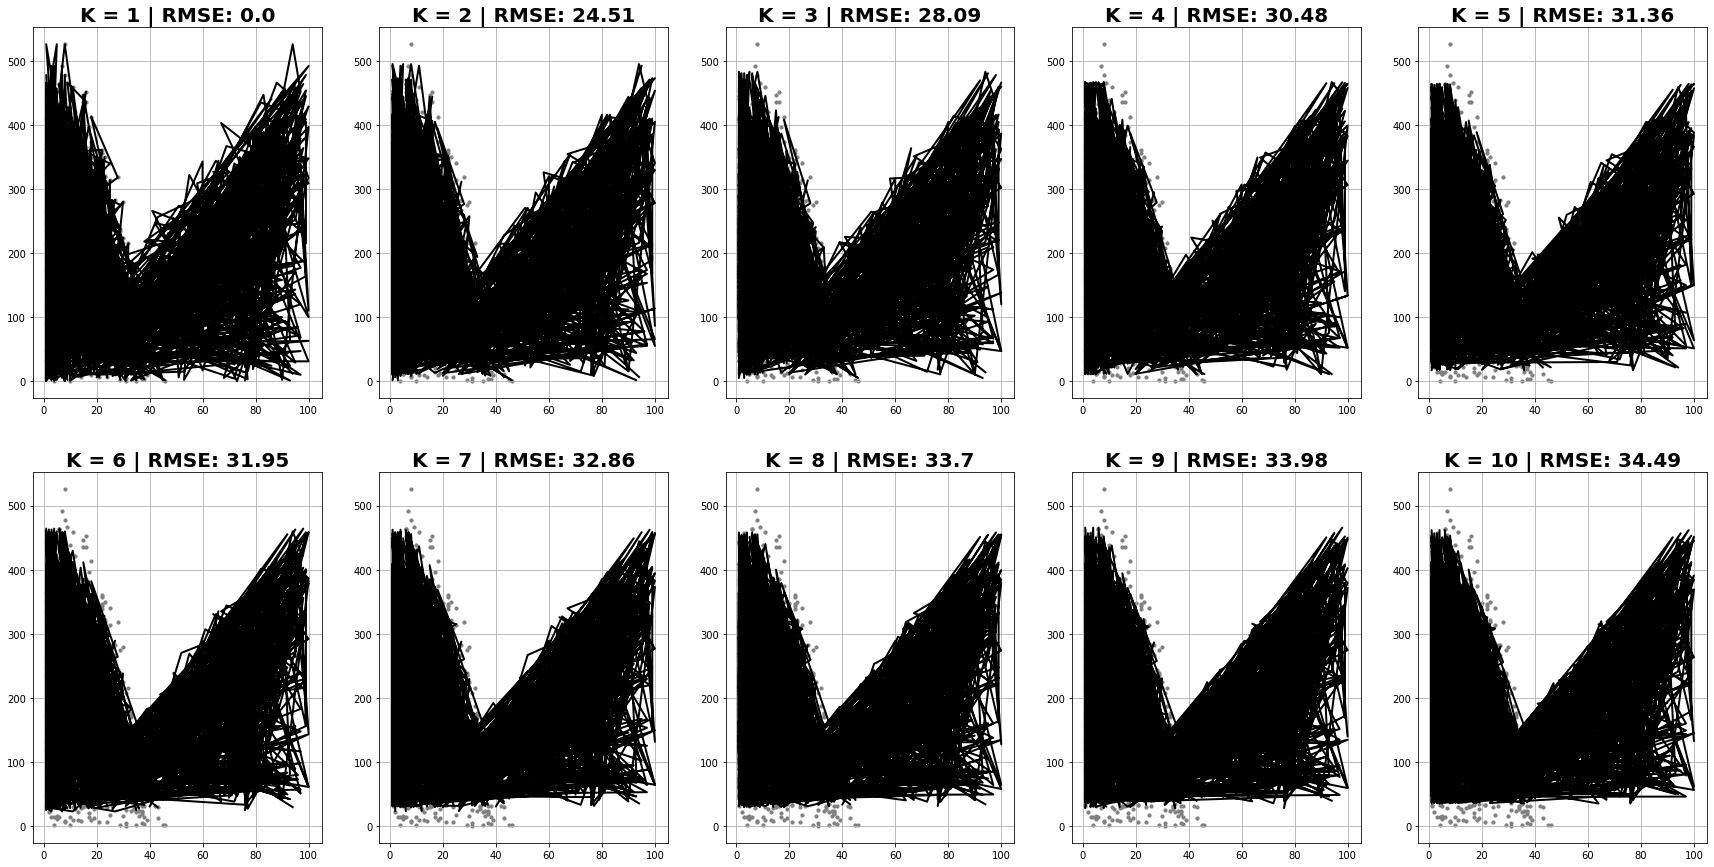

In [1601]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_completo, Y_completo)
    rmse_knn = np.round(RMSE(y = Y_completo, y_pred = knn.predict(X_completo)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X_completo, knn.predict(X_completo), c = 'black', lw = 2)
    plt.scatter(df_completo_treino['perc_pol'], df_completo_treino['crimes'], s = 10, c = 'gray')
    plt.grid()

plt.show()

In [1602]:
X_completo = df_completo_treino[['ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed']].values
Y_completo = df_completo_treino['crimes'].values
Xnovo_completo = df_completo_teste[['ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed']].values
Ynovo_completo = df_completo_teste['crimes'].values

In [1603]:
# Dimensionando Y para igualar a X, para poder plotar o grafico
Y_completo_redmencionado = np.c_[Y_completo, Y_completo, Y_completo, Y_completo]
Ynovo_completo_redmencionado = np.c_[Ynovo_completo, Ynovo_completo, Ynovo_completo, Ynovo_completo]

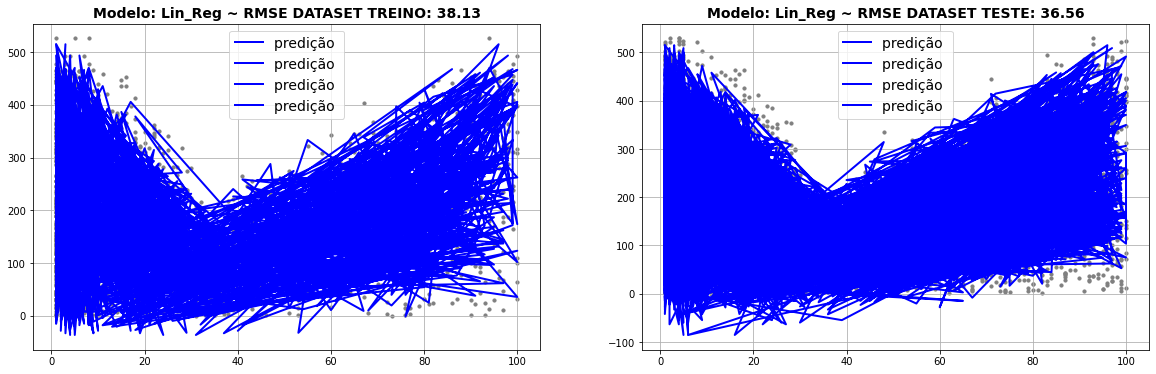

In [1604]:
modelo_completo = LinearRegression()
nome_modelo_completo = 'Lin_Reg'
plota_curva_regressao(X_completo, Y_completo_redmencionado, Xnovo_completo, Ynovo_completo_redmencionado, modelo_completo, nome_modelo_completo)

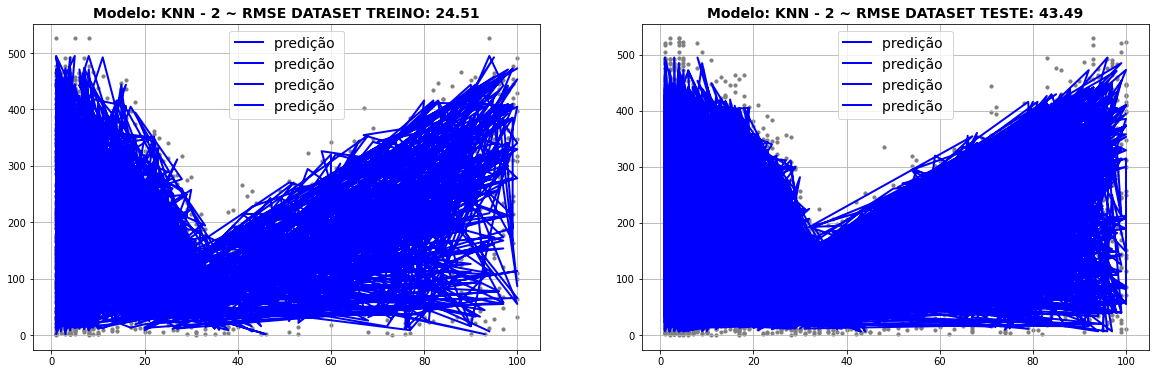

In [1605]:
modelo_completo = KNeighborsRegressor(n_neighbors = 2)
nome_modelo_completo = 'KNN - 2'
plota_curva_regressao(X_completo, Y_completo_redmencionado, Xnovo_completo, Ynovo_completo_redmencionado, modelo_completo, nome_modelo_completo)

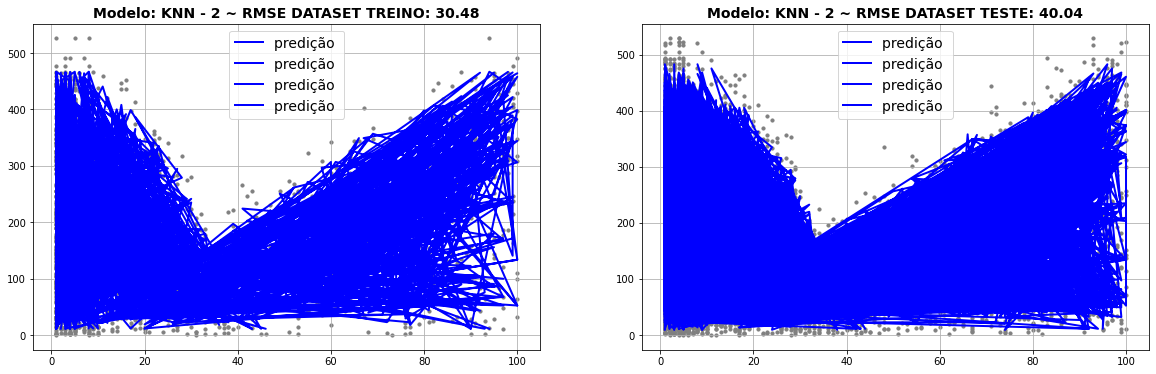

In [1606]:
modelo_completo = KNeighborsRegressor(n_neighbors = 4)
nome_modelo = 'KNN - 4'
plota_curva_regressao(X_completo, Y_completo_redmencionado, Xnovo_completo, Ynovo_completo_redmencionado, modelo_completo, nome_modelo_completo)

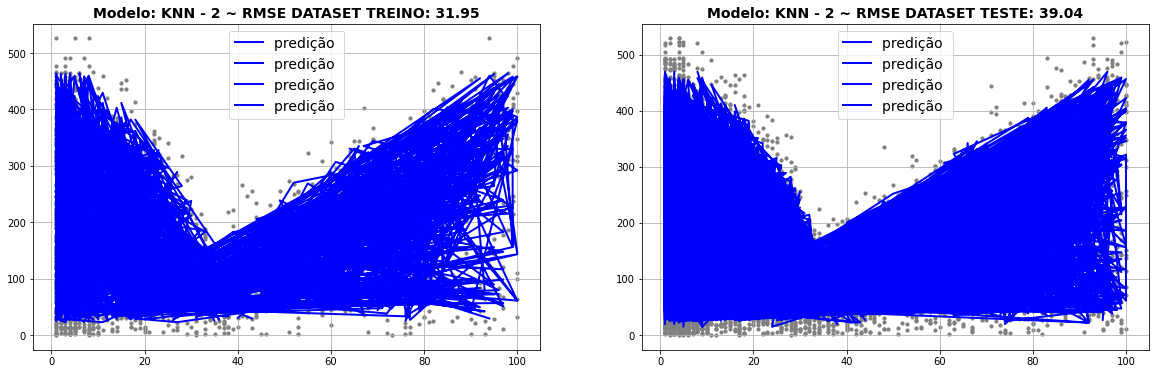

In [1607]:
modelo_completo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 6'
plota_curva_regressao(X_completo, Y_completo_redmencionado, Xnovo_completo, Ynovo_completo_redmencionado, modelo_completo, nome_modelo_completo)

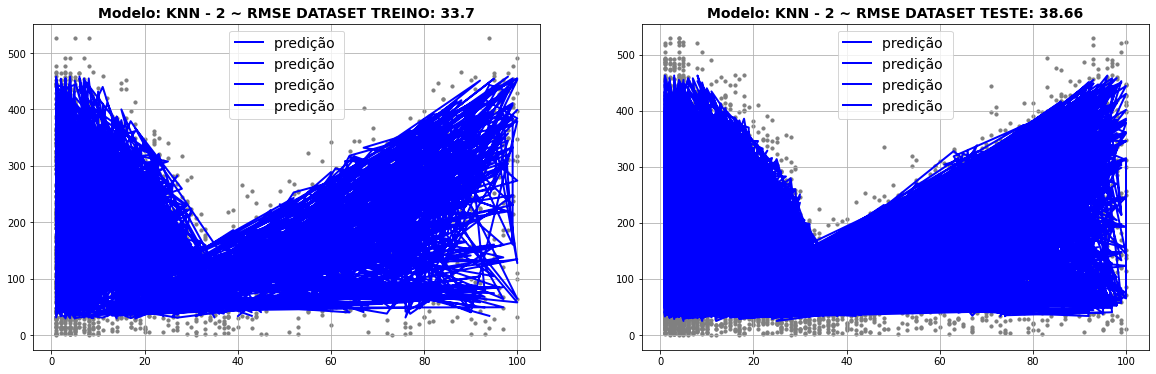

In [1608]:
modelo_completo = KNeighborsRegressor(n_neighbors = 8)
nome_modelo = 'KNN - 8'
plota_curva_regressao(X_completo, Y_completo_redmencionado, Xnovo_completo, Ynovo_completo_redmencionado, modelo_completo, nome_modelo_completo)

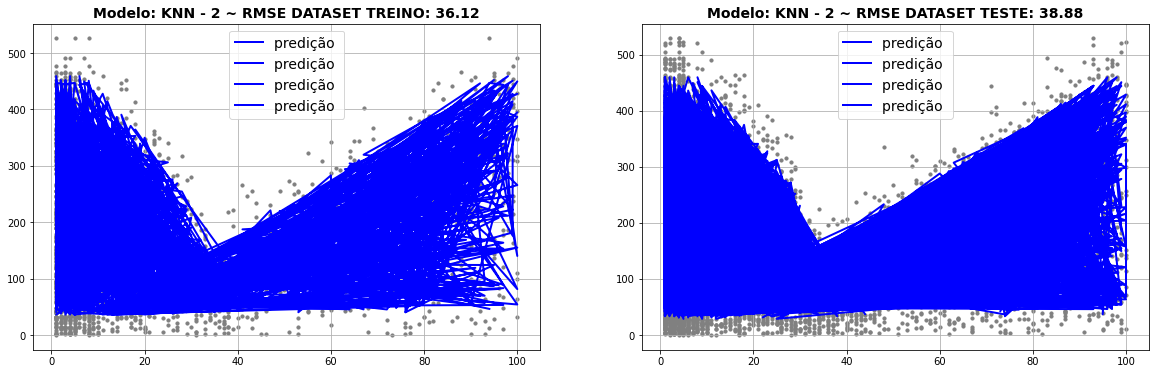

In [1609]:
modelo_completo = KNeighborsRegressor(n_neighbors = 12)
nome_modelo = 'KNN - 12'
plota_curva_regressao(X_completo, Y_completo_redmencionado, Xnovo_completo, Ynovo_completo_redmencionado, modelo_completo, nome_modelo_completo)